# Outlier Detection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# Load data (replace with your file paths)
file_paths = {
    "Netflix_Titles": r"C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix\Cleaned_Netflix_Titles_Data.csv",

}

In [6]:
# Read CSV files into DataFrames
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

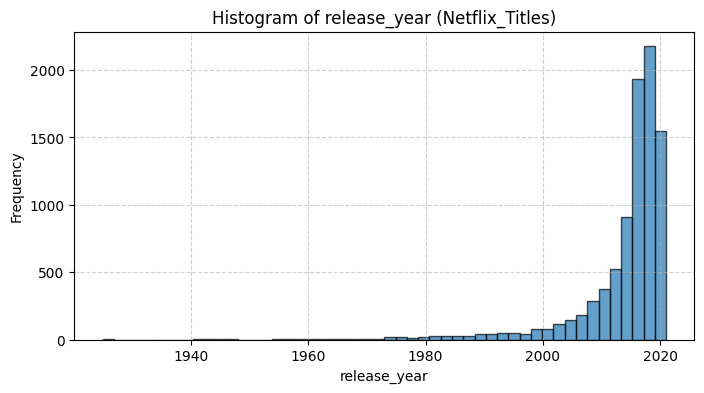

Histogram visualization completed.


In [7]:
# Plot histograms to analyze data distribution before deciding on outlier removal methods
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numerical columns
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        plt.hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)  # Drop NaN values before plotting
        plt.title(f"Histogram of {col} ({name})")  # Set title with dataset and column name
        plt.xlabel(col)  # Label x-axis
        plt.ylabel("Frequency")  # Label y-axis
        plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visualization
        plt.show()  # Display the plot

print("Histogram visualization completed.")

In [8]:
# Function to detect outliers using IQR method (Interquartile Range)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Calculate interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower threshold for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper threshold for outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Identify outliers
    return outliers

In [9]:
# Function to cap outliers using percentile method (1%-99%)
def cap_outliers_percentile(df, column):
    lower_percentile = df[column].quantile(0.01)  # 1st percentile
    upper_percentile = df[column].quantile(0.99)  # 99th percentile
    df[column] = np.where(df[column] < lower_percentile, lower_percentile, df[column])
    df[column] = np.where(df[column] > upper_percentile, upper_percentile, df[column])

In [ ]:
# # Function to detect outliers using Z-score method (Standard Deviation-based)
# def detect_outliers_zscore(df, column, threshold=3):
#     mean = df[column].mean()  # Calculate mean
#     std = df[column].std()  # Calculate standard deviation
#     outliers = df[np.abs((df[column] - mean) / std) > threshold]  # Identify values beyond threshold (default 3 std deviations)
#     return outliers

In [10]:
# Compute descriptive statistics for numerical columns
distribution_stats = {}

for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
    
    stats = df[numeric_cols].describe().T  # Compute statistics (transpose for readability)
    stats["skewness"] = df[numeric_cols].skew()  # Compute skewness
    stats["kurtosis"] = df[numeric_cols].kurtosis()  # Compute kurtosis
    
    distribution_stats[name] = stats


In [11]:
# Display results
for name, stats_df in distribution_stats.items():
    print(f"\nDistribution Statistics for {name}:")
    print(stats_df)


Distribution Statistics for Netflix_Titles:
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  skewness   kurtosis  
release_year  2021.0 -3.446565  16.232226  


In [12]:
print("Descriptive statistics computation completed.")

Descriptive statistics computation completed.


In [13]:
# Apply percentile capping to all numeric columns
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
    for col in numeric_cols:
        cap_outliers_percentile(df, col)  # Apply percentile method

In [16]:
# Save the cleaned data (update paths as needed)
import os

# 定义你的输出目录
output_dir = r"C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix"

# 确保目录存在
os.makedirs(output_dir, exist_ok=True)

# 保存清理后的数据
for name, df in dfs.items():
    file_path = os.path.join(output_dir, f"Cleaned_{name}_Data_Percentile.csv")
    df.to_csv(file_path, index=False)  # 保存 DataFrame

print("清理后的数据已成功保存到:", output_dir)


清理后的数据已成功保存到: C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix


In [17]:
print("Outlier handling using percentile method completed.")

Outlier handling using percentile method completed.


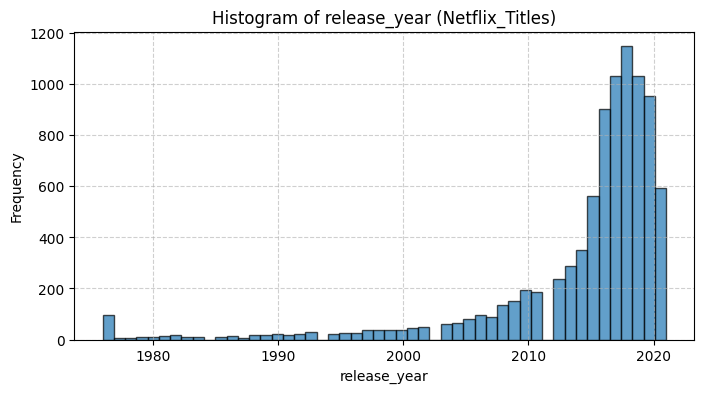

Histogram visualization completed.


In [18]:
# Plot histograms to analyze data distribution before deciding on outlier removal methods
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numerical columns
for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        plt.hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)  # Drop NaN values before plotting
        plt.title(f"Histogram of {col} ({name})")  # Set title with dataset and column name
        plt.xlabel(col)  # Label x-axis
        plt.ylabel("Frequency")  # Label y-axis
        plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visualization
        plt.show()  # Display the plot

print("Histogram visualization completed.")

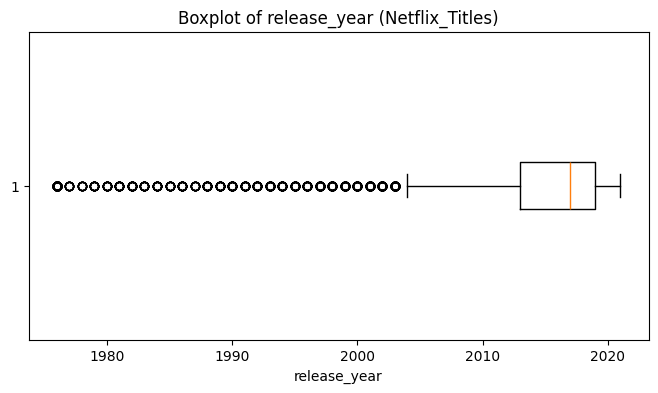

In [19]:
# Plot boxplots for numeric columns to visualize outliers
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numerical columns
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[col].dropna(), vert=False)  # Drop NaN values before visualization
        plt.title(f"Boxplot of {col} ({name})")  # Set title with dataset and column name
        plt.xlabel(col)  # Label x-axis
        plt.show()  # Display the plot

In [21]:
# Function to handle outliers using Standard Deviation Method (Capping at Mean ± 3*Std)
def cap_outliers_std(df, column, threshold=3):
    mean = df[column].mean()  # Calculate mean
    std = df[column].std()  # Calculate standard deviation
    lower_bound = mean - threshold * std  # Set lower bound
    upper_bound = mean + threshold * std  # Set upper bound
    # Replace values beyond bounds with corresponding bound values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [22]:
# Apply standard deviation capping to all numeric columns
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
    for col in numeric_cols:
        cap_outliers_std(df, col)  # Apply outlier capping

In [23]:
# Save the cleaned data (update paths as needed)
import os

# Define the save directory (without the incorrect 'to/' subfolder)
save_directory = r"C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix"

# Ensure the directory exists before saving
os.makedirs(save_directory, exist_ok=True)

# Save cleaned DataFrames with standardized names
for name, df in dfs.items():
    save_path = os.path.join(save_directory, f"Cleaned_{name}_Data_STD.csv")
    df.to_csv(save_path, index=False)
    print(f"Saved: {save_path}")


Saved: C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix\Cleaned_Netflix_Titles_Data_STD.csv


In [ ]:
print("Outlier detection and handling completed.")

Outlier detection and handling completed.


: 